## **MASTER'S DEGREE IN APPLIED ARTIFICIAL INTELLIGENCE.**

**Course:** TC5035.10 - Integration project

**Tecnológico de Monterrey**

**Professor:** Dra. Grettel Barceló Alonso

**Provessor:** Dr. Luis Eduardo Falcón Morales

**Advisory Professor:** María de la Paz Rico Fernández

### **Week 6, Activity 4**

Progress 4: Alternative models

###**Team 12:**

Luis Ángel Seda Marcos
A01795301@tec.mx

Christopher Flores González
A01795419@tec.mx

Luis Felipe Nicanor Gutiérrez
A01795631@tec.mx

# Objective

*   Explore a diverse range of techniques and approaches to identify the best performer on the dataset in question.

*   Find the optimal configuration that maximizes model performance on a specific task.

# Instructions

This step focuses on developing several individual models using different algorithms to determine which one performs best for the given problem. Since each algorithm may excel with specific data types or tasks, building alternative models helps identify the most effective approach.

Additionally, model performance can be enhanced through hyperparameter tuning. By adjusting and testing various hyperparameter settings, you can optimize each model’s accuracy and efficiency, ultimately selecting the configuration that delivers the best overall results.

The following are actions that will be addressed in this advance:

*   Build at least six different models (individual, not ensemble), using various algorithms.
*  Compare the performance of the models obtained.
*  Select the two models that provide the best performance.
*  Fit the two best models.
*  Select the final individual model.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import of Libraries

In [35]:
# General imports
import pandas as pd
import time
import os
import numpy as np
import tensorflow as tf

# Preprocessing and data splitting
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers, models, callbacks

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [3]:
# ============================================================
# Dataset selection
# ============================================================
# df = pd.read_csv('../../src/files/clips_features_flattened_pca.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA/Proyecto integrador/clips_features_flattened_pca.csv')

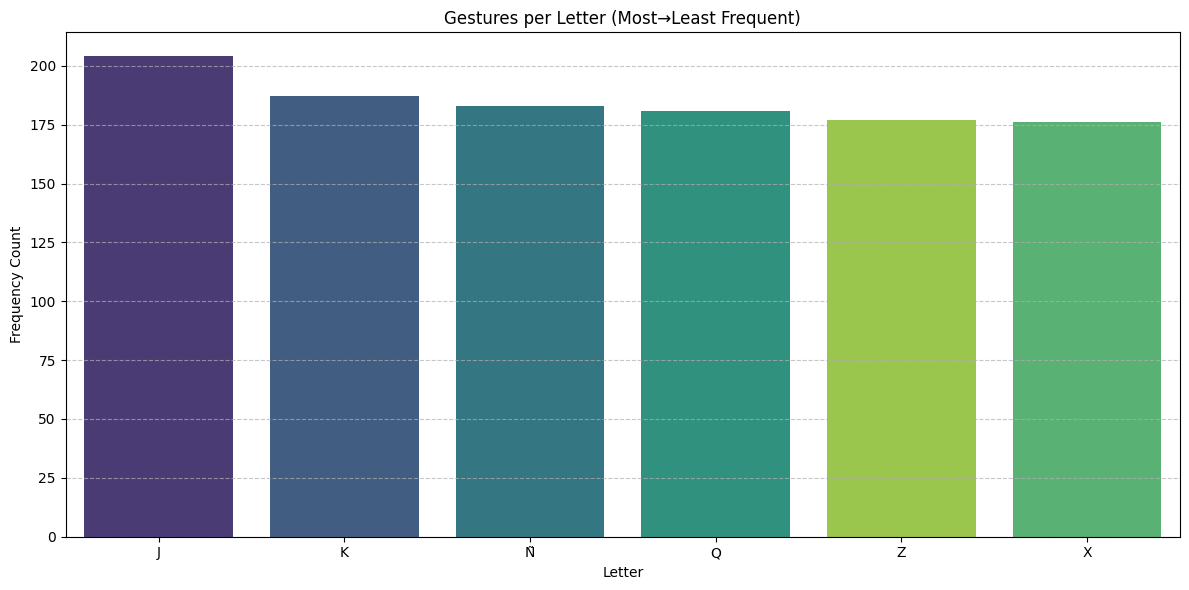

In [8]:
letter_order_desc = df['class_id'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='class_id',
    hue='class_id',
    order=letter_order_desc,
    palette='viridis',
)
plt.title('Gestures per Letter (Most→Least Frequent)')
plt.xlabel('Letter')
plt.ylabel('Frequency Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Separation of Characteristics (X) and Target Variable (y)

In [23]:
# ============================================================
# Features (X) y Labels (y)
# ============================================================
y = df["class_id"].values
X = df.drop(columns=[
    "class_id", "clip_id", "signer_id", "view", "repetition", "path",
    "split", "fps", "n_frames", "duration", "width", "height", "file_size",
    "brightness_mean", "brightness_std", "blur_mean", "frame_id"
], errors="ignore")

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label encoding
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

# Split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# Split temp and trap / test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

In [24]:
print("classes:", class_names)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

classes: ['J' 'K' 'Ñ' 'Q' 'X' 'Z']
X_train shape: (886, 250)
y_train shape: (886,)
X_test shape: (111, 250)
y_test shape: (111,)


# Building and Evaluating Individual Models


We will build and evaluate at least 6 individual classification models in order to identify the one that best fits the proposed solution, which is the identification of dynamic signs:

*  Logistic Regression
*  Random Forest
*  SVM
*  MLP
*  LSTM
*  GRU

For each model, we will measure:

*  Training time.
*  Accuracy.
*  F1-Score (Macro).
*  Precision (Macro).
*  Recall (Macro).

The main metric for comparison will be the F1-Score (Macro).

In [33]:
# ============================
# Classic Models
# ============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "MLP": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)
}
print(f"\n=== Classic Models ===")
for nombre, modelo in models.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\n=== {nombre} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))


=== Classic Models ===

=== Logistic Regression ===
Accuracy: 0.9099099099099099
              precision    recall  f1-score   support

           J       1.00      1.00      1.00        21
           K       0.89      0.84      0.86        19
          Ñ       1.00      0.94      0.97        18
           Q       0.88      0.83      0.86        18
           X       0.76      0.89      0.82        18
           Z       0.94      0.94      0.94        17

    accuracy                           0.91       111
   macro avg       0.91      0.91      0.91       111
weighted avg       0.91      0.91      0.91       111


=== Random Forest ===
Accuracy: 0.918918918918919
              precision    recall  f1-score   support

           J       0.91      1.00      0.95        21
           K       0.85      0.89      0.87        19
          Ñ       1.00      0.89      0.94        18
           Q       0.93      0.78      0.85        18
           X       0.89      0.94      0.92        18

In [30]:
RANDOM_STATE = 42
models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE, max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    "SVM": SVC(random_state=RANDOM_STATE),
    "MLP": MLPClassifier(random_state=RANDOM_STATE, hidden_layer_sizes=(128, 64), max_iter=300)
}

results = []

for name, estimator in models.items():
    print(f"Training {name}…")
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf",    estimator)
    ])

    start = time.time()
    pipe.fit(X_train, y_train)
    elapsed = time.time() - start

    preds       = pipe.predict(X_test)
    raw_f1      = f1_score(y_test, preds, average="macro")
    raw_acc     = accuracy_score(y_test, preds)
    raw_prec    = precision_score(y_test, preds, average="macro")
    raw_rec     = recall_score(y_test, preds, average="macro")

    results.append({
        "model":             name,
        "train_time (s)":    round(elapsed,   4),
        "accuracy":          round(float(raw_acc),  4),
        "f1_macro":          round(float(raw_f1),  4),
        "precision_macro":   round(float(raw_prec), 4),
        "recall_macro":      round(float(raw_rec),  4),
    })

# Build DataFrame and sort by our primary metric (F1-Macro)
results_df = (
    pd.DataFrame(results)
      .sort_values("f1_macro", ascending=False)
      .reset_index(drop=True)
)
display(results_df)

Training Logistic Regression…
Training Random Forest…
Training SVM…
Training MLP…


,model,train_time (s),accuracy,f1_macro,precision_macro,recall_macro
0,Random Forest,1.6320,0.9189,0.9175,0.9186,0.9181
1,Logistic Regression,0.0767,0.9099,0.9092,0.9124,0.9083
2,SVM,0.1627,0.8378,0.8459,0.8930,0.8367
3,MLP,1.2201,0.8468,0.8415,0.8408,0.8455


In [38]:
# ============================
# RNN con LSTM / GRU
# ============================
# Fit dimensions for RNN: (samples, timesteps, features)
# Here we treat each row as a sequence of 1 timestep

X_train_rnn = np.expand_dims(X_train, axis=1)
X_test_rnn = np.expand_dims(X_test, axis=1)

# LSTM
start_LSTM = time.time()
model_lstm = models.Sequential([
    layers.LSTM(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    layers.Dense(len(le.classes_), activation="softmax")
])

model_lstm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_lstm.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

loss, acc = model_lstm.evaluate(X_test_rnn, y_test)
elapsed_LSTM = time.time() - start_LSTM
print("\n=== LSTM ===")
print("Accuracy:", acc)
print("Training time in seconds:", elapsed_LSTM)

# GRU
start_GRU = time.time()
model_gru = models.Sequential([
    layers.GRU(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    layers.Dense(len(le.classes_), activation="softmax")
])

model_gru.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_gru.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

loss, acc = model_gru.evaluate(X_test_rnn, y_test)
elapsed_GRU = time.time() - start_GRU
print("\n=== GRU ===")
print("Accuracy:", acc)
print("Training time in seconds:", elapsed_GRU)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2706 - loss: 1.7428 - val_accuracy: 0.5112 - val_loss: 1.6482
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8456 - loss: 1.4058 - val_accuracy: 0.6348 - val_loss: 1.4919
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9841 - loss: 1.0894 - val_accuracy: 0.7528 - val_loss: 1.3184
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9906 - loss: 0.7881 - val_accuracy: 0.7978 - val_loss: 1.1466
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9898 - loss: 0.5441 - val_accuracy: 0.8427 - val_loss: 0.9870
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9969 - loss: 0.3527 - val_accuracy: 0.8539 - val_loss: 0.8538
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9984 - loss: 0.2274 - val_accuracy: 0.8596 - val_loss: 0.7583
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9934 - loss: 0.1642 - val_accuracy: 0.8708 - va

# Insights from Baseline Models


*   **Random Forest** and **LogisticRegression** tops the leaderboard with a macro F1 of **0.9175** and accuracy **0.9092**.
*   **LSTM** and **GRU** are the slowest to train, around 5 seconds, but with decent performance (acc = 0.86 abd acc = 0.84).
*   **SVM** follows closely (F1 = 0.8459, acc = 0.8378) with a much shorter training time (~0.16 s).
*   **MLP** delivers the lowest F1-scores.

# Fine-tuning Random Forest and Logistic Regression

Focus on fine-tuning Random Forest and Logistic Regression to improve their macro F1.

In [56]:
# Define search spaces for hyperparameters
param_dist_lr = {
    "clf__C": np.logspace(-4, 4, 20),
    "clf__solver": ["liblinear", "lbfgs"]
}

param_dist_rf = {
    "clf__n_estimators": [100, 200, 500],
    "clf__max_depth": [None, 10, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__bootstrap": [True, False]
}

tuned_results = []

In [57]:
# ============================================================
# Fine-tuning Random Forest
# ============================================================

print("Fine-tuning Random Forest...")
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=RANDOM_STATE))
])
random_search_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring="f1_macro",
    random_state=RANDOM_STATE,
    n_jobs=-1
)
start_rf_tuned = time.time()
random_search_rf.fit(X_train, y_train)
elapsed_rf_tuned = time.time() - start_rf_tuned

best_rf_model = random_search_rf.best_estimator_
preds_rf_tuned = best_rf_model.predict(X_test)

tuned_results.append({
    "model": "Random Forest (Tuned)",
    "train_time (s)": round(elapsed_rf_tuned, 4),
    "accuracy": round(accuracy_score(y_test, preds_rf_tuned), 4),
    "f1_macro": round(f1_score(y_test, preds_rf_tuned, average="macro"), 4),
    "precision_macro": round(precision_score(y_test, preds_rf_tuned, average="macro"), 4),
    "recall_macro": round(recall_score(y_test, preds_rf_tuned, average="macro"), 4)
})

print("Best params:", random_search_rf.best_params_)

Fine-tuning Random Forest...
Best params: {'clf__n_estimators': 500, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_depth': 20, 'clf__bootstrap': False}


In [59]:
# ============================================================
# Fine-tuning Logistic Regression
# ============================================================

print("Fine-tuning Logistic Regression...")
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=RANDOM_STATE, max_iter=500))
])
random_search_lr = RandomizedSearchCV(
    pipe_lr,
    param_distributions=param_dist_lr,
    n_iter=10,
    cv=5,
    scoring="f1_macro",
    random_state=RANDOM_STATE,
    n_jobs=-1
)
start_lr_tuned = time.time()
random_search_lr.fit(X_train, y_train)
elapsed_lr_tuned = time.time() - start_lr_tuned

best_lr_model = random_search_lr.best_estimator_
preds_lr_tuned = best_lr_model.predict(X_test)

tuned_results.append({
    "model": "Logistic Regression (Tuned)",
    "train_time (s)": round(elapsed_lr_tuned, 4),
    "accuracy": round(accuracy_score(y_test, preds_lr_tuned), 4),
    "f1_macro": round(f1_score(y_test, preds_lr_tuned, average="macro"), 4),
    "precision_macro": round(precision_score(y_test, preds_lr_tuned, average="macro"), 4),
    "recall_macro": round(recall_score(y_test, preds_lr_tuned, average="macro"), 4)
})

print("Best params:", random_search_lr.best_params_)

Fine-tuning Logistic Regression...
Best params: {'clf__solver': 'liblinear', 'clf__C': np.float64(0.03359818286283781)}


In [62]:
# Tuned Random Forest
print("\n=== Random Forest (Tuned) ===")
print(classification_report(y_test, preds_rf_tuned, target_names=le.classes_))

# Tuned Logistic Regression
print("\n=== Logistic Regression (Tuned) ===")
print(classification_report(y_test, preds_lr_tuned, target_names=le.classes_))


=== Random Forest (Tuned) ===
              precision    recall  f1-score   support

           J       0.95      1.00      0.98        21
           K       0.90      0.95      0.92        19
          Ñ       1.00      0.94      0.97        18
           Q       0.94      0.89      0.91        18
           X       0.94      0.94      0.94        18
           Z       1.00      1.00      1.00        17

    accuracy                           0.95       111
   macro avg       0.96      0.95      0.95       111
weighted avg       0.96      0.95      0.95       111


=== Logistic Regression (Tuned) ===
              precision    recall  f1-score   support

           J       1.00      1.00      1.00        21
           K       0.94      0.84      0.89        19
          Ñ       1.00      0.94      0.97        18
           Q       0.89      0.89      0.89        18
           X       0.76      0.89      0.82        18
           Z       0.94      0.94      0.94        17

    accur

In [60]:
# Combine and display results
tuned_results_df = (
    pd.DataFrame(tuned_results)
    .sort_values("f1_macro", ascending=False)
    .reset_index(drop=True)
)

print("\n=== Tuned Model Results ===")
display(tuned_results_df)

# Combine with previous results for comparison
all_results_df = pd.concat([results_df, tuned_results_df], ignore_index=True)
all_results_df = all_results_df.sort_values("f1_macro", ascending=False).reset_index(drop=True)

print("\n=== All Model Results ===")
display(all_results_df)


=== Tuned Model Results ===


,model,train_time (s),accuracy,f1_macro,precision_macro,recall_macro
0,Random Forest (Tuned),118.7211,0.9550,0.9550,0.9567,0.9542
1,Logistic Regression (Tuned),3.6920,0.9189,0.9185,0.9222,0.9176



=== All Model Results ===


,model,train_time (s),accuracy,f1_macro,precision_macro,recall_macro
0,Random Forest (Tuned),118.7211,0.9550,0.9550,0.9567,0.9542
1,Logistic Regression (Tuned),3.6920,0.9189,0.9185,0.9222,0.9176
2,Random Forest,1.6320,0.9189,0.9175,0.9186,0.9181
3,Logistic Regression,0.0767,0.9099,0.9092,0.9124,0.9083
4,SVM,0.1627,0.8378,0.8459,0.8930,0.8367
5,MLP,1.2201,0.8468,0.8415,0.8408,0.8455


While the **Tuned Random Forest** achieved the highest F1-macro score, there are strong arguments for considering **Logistic Regression**, particularly the tuned version, as the recommended model, especially when considering factors beyond just the primary metric.

Some reasons why Tuned Logistic Regression could be the preferred choice:

*   **Faster Training Time:** The most significant advantage of the Tuned Logistic Regression model is its significantly faster training time (3.6920 seconds) compared to the Tuned Random Forest (118.7211 seconds). In scenarios where rapid model iteration, frequent retraining, or deployment to resource-constrained environments are critical, this difference is substantial.

*   **Good Performance:** While not the absolute highest, the Tuned Logistic Regression still achieved a very respectable macro F1 score of 0.9185 and accuracy of 0.9189. This performance is very close to the baseline Random Forest model and a significant improvement over the baseline Logistic Regression. For many applications, this level of performance might be more than sufficient, making the trade-off in F1 score acceptable for the gain in speed.

*   **Interpretability:** Logistic Regression is a much simpler and more interpretable model compared to Random Forest or neural networks. It provides clear coefficients that indicate the direction and magnitude of the relationship between each feature and the log-odds of the target variable. If understanding why a model makes a particular prediction is important (e.g., for debugging, compliance, or gaining insights into the data), Logistic Regression is a much better choice. While PCA makes direct interpretation of the original features difficult, the linear nature of Logistic Regression on the PCA components is still more transparent than a complex ensemble method.

*   **Less Prone to Overfitting (Compared to Complex Models):** As a linear model, Logistic Regression is generally less prone to overfitting compared to more complex models like deep neural networks or even potentially Random Forests with many trees and deep individual trees, especially on smaller datasets.

**Considerations and Trade-offs:**

*   **Slightly Lower F1-Macro:** The main trade-off is the slightly lower macro F1 score compared to the Tuned Random Forest. If achieving the absolute highest possible performance is the only goal, then Random Forest is superior.

**Why not Random Forest (Tuned)?**

While it has the highest F1-macro, its significantly longer training time might be a major drawback in certain practical scenarios. The increased complexity also reduces interpretability.

**Why not SVM or MLP?**

These models had lower performance compared to both Random Regression and Random Forest.

**Why not LSTM or GRU?**

Similar to SVM and MLP, these models did not show superior performance and had longer training times, and are generally more complex and less interpretable than Logistic Regression.

# Conclusion

If the primary concern is achieving the highest possible macro F1 score regardless of training time or interpretability, the **Tuned Random Forest** is the recommended model. However, if training speed, interpretability, and solid performance are key considerations, the **Tuned Logistic Regression** presents a compelling alternative and could be the recommended **final individual model**, as its performance is still very good and the benefits in terms of speed and transparency are significant.